In [143]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: protobuf<3.20,>=3.9.2 in c:\users\kiit1\anaconda3\lib\site-packages (from tensorflow) (3.19.1)



In [144]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

*italicized text*











#                                                          **S&P Analysis**

In [145]:
# Reading dataset
stock_data=pd.read_csv("D:\internship_technocolab\project\S&P500_HistoricalData_1656311331506.csv")
stock_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/24/2022,3911.74,--,3821.75,3913.65,3821.75
1,06/23/2022,3795.73,--,3774.71,3802.58,3743.52
2,06/22/2022,3759.89,--,3733.89,3801.79,3717.69
3,06/21/2022,3764.79,--,3715.31,3779.65,3715.31
4,06/17/2022,3674.84,--,3665.90,3707.71,3636.87


DATA CLEANING

As volume contains null value and volume means the number of shares bought or sold during the paricular period i.e. can't be calculated from given dataset. So removing the volume column.

In [146]:
std_1=stock_data.copy()
std_1["Volume"]=std_1["Volume"].replace("--",np.nan)
std_1 = std_1.dropna(axis=1)
std_1.head()

,Date,Close/Last,Open,High,Low
0,06/24/2022,3911.74,3821.75,3913.65,3821.75
1,06/23/2022,3795.73,3774.71,3802.58,3743.52
2,06/22/2022,3759.89,3733.89,3801.79,3717.69
3,06/21/2022,3764.79,3715.31,3779.65,3715.31
4,06/17/2022,3674.84,3665.90,3707.71,3636.87


In [147]:
std_1["High"].value_counts()

0.00       33
2578.29     2
2761.85     2
2674.35     2
2074.28     2
           ..
2816.88     1
2808.02     1
2793.73     1
2795.76     1
1334.40     1
Name: High, Length: 2497, dtype: int64

Since 33 rows of column Close/Last, High, Low is having 0.00 value. They belong to the date of christmas,new year,etc.. So, removing such missing rows.

In [148]:
std_2 = std_1.copy()
std_2["High"]=std_2["High"].replace(0, np.nan)
std_2=std_2.dropna(axis=0)
std_2.head()

,Date,Close/Last,Open,High,Low
0,06/24/2022,3911.74,3821.75,3913.65,3821.75
1,06/23/2022,3795.73,3774.71,3802.58,3743.52
2,06/22/2022,3759.89,3733.89,3801.79,3717.69
3,06/21/2022,3764.79,3715.31,3779.65,3715.31
4,06/17/2022,3674.84,3665.90,3707.71,3636.87


In [149]:
std_2.shape

(2515, 5)

In [150]:
# converting date column to datetime format to access day, month and year 
std_2["Date"]=pd.to_datetime(std_2["Date"],format="%m/%d/%Y")
std_2

,Date,Close/Last,Open,High,Low
0,2022-06-24,3911.74,3821.75,3913.65,3821.75
1,2022-06-23,3795.73,3774.71,3802.58,3743.52
2,2022-06-22,3759.89,3733.89,3801.79,3717.69
3,2022-06-21,3764.79,3715.31,3779.65,3715.31
4,2022-06-17,3674.84,3665.90,3707.71,3636.87
...,...,...,...,...,...
2543,2012-07-03,1374.02,1365.75,1374.81,1363.53
2544,2012-07-02,1365.51,1362.33,1366.35,1355.70
2545,2012-06-29,1362.16,1330.12,1362.17,1330.12
2546,2012-06-28,1329.04,1331.52,1331.52,1313.29


Checking for Outliers in Close/last column w.r.t to years.

<AxesSubplot:title={'center':'Outliers in stock price w.r.t years'}, xlabel='year', ylabel='Close/Last'>

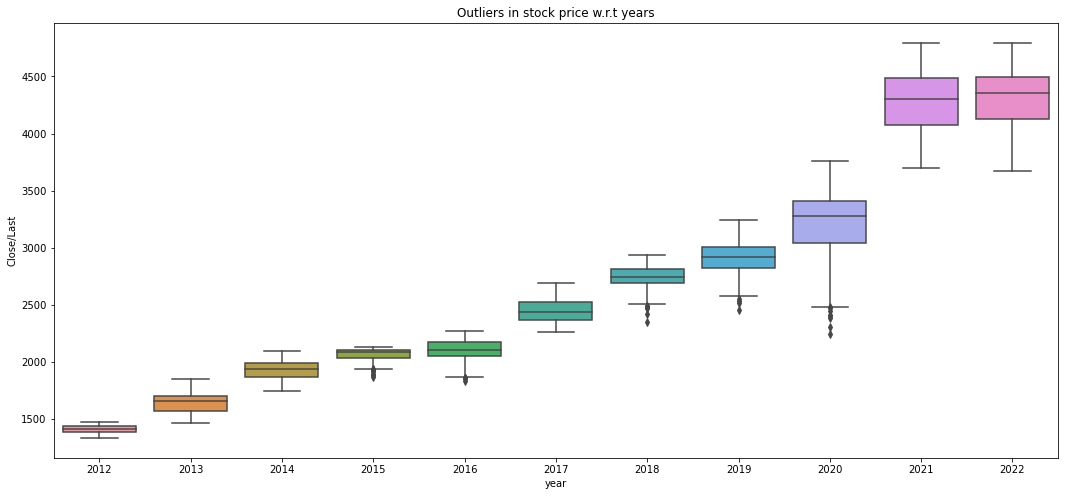

In [151]:
std_2["year"]=std_2["Date"].dt.year
plt.figure(figsize=(18,8))
plt.title("Outliers in stock price w.r.t years")
sns.boxplot(x=std_2.year,y= std_2["Close/Last"])

From box-plot it is clear theat in year 2015, 2016, 2018, 2019, 2020 is having outliers with their closing price. So we need to remove outliers from these years.

In [152]:
#  bifuracting years w.r.t one which are having outliers. 
c=[2015,2016,2018,2019,2020]
y=[]
for i in c:
  s= std_2[std_2.year==i]
  y.append(s)
print(y)  

# bifuracting years w.r.t one which is not having outliers
d=[2012,2013,2014,2017,2021,2022]
k=[]
for i in d:
  b = std_2[std_2.year==i]
  k.append(b)

[           Date  Close/Last     Open     High      Low  year
1631 2015-12-31     2043.94  2060.59  2062.54  2043.62  2015
1632 2015-12-30     2063.36  2077.34  2077.34  2061.97  2015
1633 2015-12-29     2078.36  2060.54  2081.56  2060.54  2015
1634 2015-12-28     2056.50  2057.77  2057.77  2044.20  2015
1636 2015-12-24     2060.99  2063.52  2067.36  2058.73  2015
...         ...         ...      ...      ...      ...   ...
1886 2015-01-08     2062.14  2030.61  2064.08  2030.61  2015
1887 2015-01-07     2025.90  2005.55  2029.61  2005.55  2015
1888 2015-01-06     2002.61  2022.15  2030.25  1992.44  2015
1889 2015-01-05     2020.58  2054.44  2054.44  2017.34  2015
1890 2015-01-02     2058.20  2058.90  2072.36  2046.04  2015

[252 rows x 6 columns],            Date  Close/Last     Open     High      Low  year
1379 2016-12-30     2238.83  2251.61  2253.58  2233.62  2016
1380 2016-12-29     2249.26  2249.50  2254.51  2244.56  2016
1381 2016-12-28     2249.92  2270.23  2271.31  2249.11  201

C:\Users\kiit1\AppData\Local\Temp\ipykernel_8152\3115593927.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i["Close/Last"]= np.where(i["Close/Last"]>high_point,high_point,i["Close/Last"])
C:\Users\kiit1\AppData\Local\Temp\ipykernel_8152\3115593927.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i["Close/Last"]= np.where(i["Close/Last"]<low_point,low_point,i["Close/Last"])
C:\Users\kiit1\AppData\Local\Temp\ipykernel_8152\3115593927.py:11: SettingWithCopyWarning: 
A value is trying to be set on a c

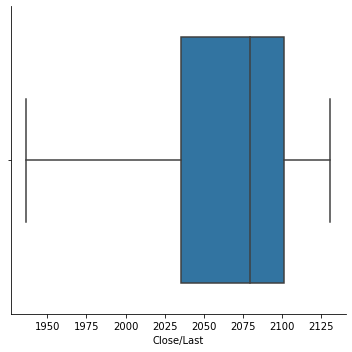

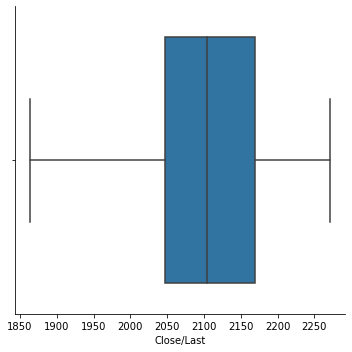

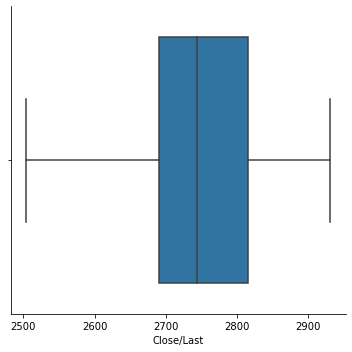

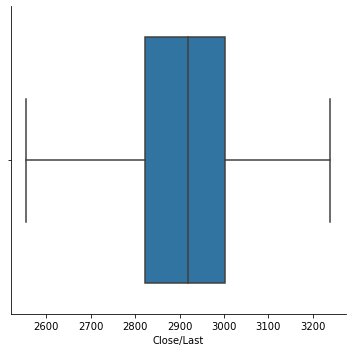

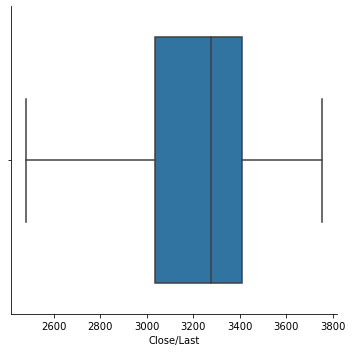

In [153]:
# removing outliers
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR= Q3- Q1
    lower_range = Q1-(1.5*IQR)
    upper_range= Q3 + (1.5*IQR)
    return lower_range,upper_range
for i in y:
  low_point,high_point= remove_outliers(i["Close/Last"])
  i["Close/Last"]= np.where(i["Close/Last"]>high_point,high_point,i["Close/Last"])
  i["Close/Last"]= np.where(i["Close/Last"]<low_point,low_point,i["Close/Last"])
  sns.catplot(x="Close/Last", data= i, kind="box")


In [154]:
# merging all the year dataframes into one and naming it new_s_p500
new_s_p500=pd.concat([k[0],k[1],k[2],y[0],y[1],k[3],y[2],y[3],y[4],k[4],k[5]],axis=0)
new_s_p500

,Date,Close/Last,Open,High,Low,year
2414,2012-12-31,1426.19,1402.43,1426.74,1398.11,2012
2415,2012-12-28,1402.43,1418.10,1418.10,1401.58,2012
2416,2012-12-27,1418.10,1419.83,1422.80,1401.80,2012
2417,2012-12-26,1419.83,1426.66,1429.42,1416.43,2012
2419,2012-12-24,1426.66,1430.15,1430.15,1424.66,2012
...,...,...,...,...,...,...
115,2022-01-07,4677.03,4697.66,4707.95,4662.74,2022
116,2022-01-06,4696.05,4693.39,4725.01,4671.26,2022
117,2022-01-05,4700.58,4787.99,4797.70,4699.44,2022
118,2022-01-04,4793.54,4804.51,4818.62,4774.27,2022


In [155]:
# checking for informations on new dataset created
print(new_s_p500.info())
print(new_s_p500.describe())
print(new_s_p500.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 2414 to 119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2515 non-null   datetime64[ns]
 1   Close/Last  2515 non-null   float64       
 2   Open        2515 non-null   float64       
 3   High        2515 non-null   float64       
 4   Low         2515 non-null   float64       
 5   year        2515 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 137.5 KB
None
        Close/Last         Open         High          Low         year
count  2515.000000  2515.000000  2515.000000  2515.000000  2515.000000
mean   2614.375432  2613.362195  2626.815336  2598.650159  2016.984891
std     873.786361   874.289398   879.979788   867.684617     2.912638
min    1329.040000  1320.710000  1331.520000  1313.290000  2012.000000
25%    1985.245000  1983.780000  1991.395000  1974.815000  2014.000000
50%   

<AxesSubplot:>

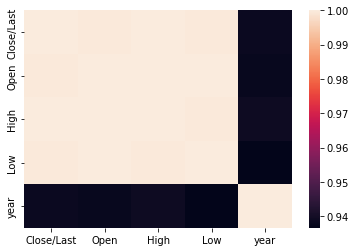

In [156]:
# Correlation among features
sns.heatmap(new_s_p500.corr())

In [157]:
# sorting date column
new_s_p500=new_s_p500.sort_values("Date", ascending=True)
new_s_p500

,Date,Close/Last,Open,High,Low,year
2547,2012-06-27,1331.85,1320.71,1334.40,1320.71,2012
2546,2012-06-28,1329.04,1331.52,1331.52,1313.29,2012
2545,2012-06-29,1362.16,1330.12,1362.17,1330.12,2012
2544,2012-07-02,1365.51,1362.33,1366.35,1355.70,2012
2543,2012-07-03,1374.02,1365.75,1374.81,1363.53,2012
...,...,...,...,...,...,...
4,2022-06-17,3674.84,3665.90,3707.71,3636.87,2022
3,2022-06-21,3764.79,3715.31,3779.65,3715.31,2022
2,2022-06-22,3759.89,3733.89,3801.79,3717.69,2022
1,2022-06-23,3795.73,3774.71,3802.58,3743.52,2022


In [158]:
# normalizing the close/last price column
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(new_s_p500["Close/Last"]).reshape(-1,1))
print(df1)

[[0.00081038]
 [0.        ]
 [0.0095515 ]
 ...
 [0.70103417]
 [0.71137009]
 [0.74482627]]


In [159]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [160]:
training_size, test_size

(1760, 755)

In [161]:
train_data

array([[0.00081038],
       [0.        ],
       [0.0095515 ],
       ...,
       [0.46612853],
       [0.45806225],
       [0.45702404]])

In [162]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----15 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [163]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(1744, 15)
(1744,)
(739, 15)
(739,)


(None, None)

In [164]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [165]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: libclang>=13.0.0 in c:\users\kiit1\anaconda3\lib\site-packages (from tensorflow) (14.0.6)



In [166]:
### Create the Stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [167]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(15,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [168]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 15, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 15, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [169]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=15,verbose=1)

Epoch 1/50
117/117 [==============================] - 13s 35ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 2/50
117/117 [==============================] - 2s 19ms/step - loss: 1.5673e-04 - val_loss: 0.0035
Epoch 3/50
117/117 [==============================] - 2s 19ms/step - loss: 1.6350e-04 - val_loss: 0.0014
Epoch 4/50
117/117 [==============================] - 2s 18ms/step - loss: 1.6806e-04 - val_loss: 0.0030
Epoch 5/50
117/117 [==============================] - 2s 18ms/step - loss: 1.8297e-04 - val_loss: 0.0019
Epoch 6/50
117/117 [==============================] - 2s 18ms/step - loss: 1.7370e-04 - val_loss: 0.0030
Epoch 7/50
117/117 [==============================] - 2s 20ms/step - loss: 1.5591e-04 - val_loss: 0.0033
Epoch 8/50
117/117 [==============================] - 2s 19ms/step - loss: 1.5187e-04 - val_loss: 0.0033
Epoch 9/50
117/117 [==============================] - 2s 19ms/step - loss: 1.7637e-04 - val_loss: 0.0017
Epoch 10/50
117/117 [==============================] - 2s 

In [170]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

24/24 [==============================] - 0s 7ms/step


In [171]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
print(train_predict)


[[1353.4841]
 [1359.7056]
 [1358.8676]
 ...
 [2952.518 ]
 [2951.1516]
 [2941.8928]]


In [172]:
test_predict

array([[2989.1824],
       [2976.36  ],
       [2983.2883],
       [3006.5583],
       [3023.649 ],
       [3007.0989],
       [3022.9114],
       [3021.04  ],
       [3011.1204],
       [2977.289 ],
       [2947.8823],
       [2928.1338],
       [2847.838 ],
       [2874.7397],
       [2894.0764],
       [2949.0078],
       [2937.539 ],
       [2892.0774],
       [2921.9287],
       [2850.589 ],
       [2840.9983],
       [2885.9197],
       [2931.2756],
       [2913.1558],
       [2924.147 ],
       [2923.8552],
       [2849.994 ],
       [2865.2354],
       [2869.5764],
       [2889.4058],
       [2928.042 ],
       [2934.4248],
       [2909.9524],
       [2931.8672],
       [2974.3848],
       [2982.0725],
       [2976.689 ],
       [2973.6611],
       [2993.9556],
       [3006.3376],
       [3004.1902],
       [2993.0916],
       [2999.3027],
       [3003.4153],
       [3004.568 ],
       [2990.409 ],
       [2988.3862],
       [2965.8572],
       [2981.703 ],
       [2980.6838],


In [173]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2186.964457111626

In [174]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3733.869314755546

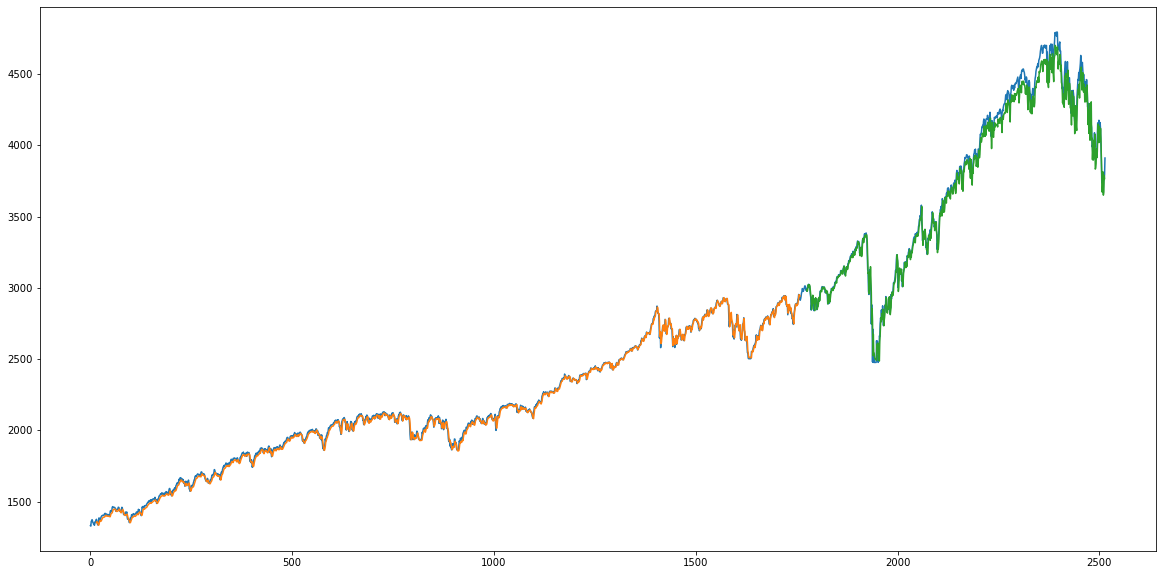

In [175]:
### Plotting 
# shift train predictions for plotting
look_back=15
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [176]:
len(test_data)

755

In [177]:
x_input=test_data[740:].reshape(1,-1)
x_input.shape

(1, 15)

In [178]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8015815337763013,
 0.8052988879660392,
 0.8166182170542635,
 0.8036665974529347,
 0.7754187430786268,
 0.7416885843484682,
 0.6980752814691769,
 0.6939945551864157,
 0.7097147240679216,
 0.6741792404946474,
 0.6765065522332965,
 0.7024472822074566,
 0.7010341685123662,
 0.7113700858250276,
 0.7448262735326687]

In [179]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=15
i=0
while(i<7):
    
    if(len(temp_input)>15):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7477986]
16
1 day input [0.80529889 0.81661822 0.8036666  0.77541874 0.74168858 0.69807528
 0.69399456 0.70971472 0.67417924 0.67650655 0.70244728 0.70103417
 0.71137009 0.74482627 0.74779862]
1 day output [[0.7423049]]
2 day input [0.81661822 0.8036666  0.77541874 0.74168858 0.69807528 0.69399456
 0.70971472 0.67417924 0.67650655 0.70244728 0.70103417 0.71137009
 0.74482627 0.74779862 0.74230492]
2 day output [[0.7281411]]
3 day input [0.8036666  0.77541874 0.74168858 0.69807528 0.69399456 0.70971472
 0.67417924 0.67650655 0.70244728 0.70103417 0.71137009 0.74482627
 0.74779862 0.74230492 0.72814113]
3 day output [[0.7095339]]
4 day input [0.77541874 0.74168858 0.69807528 0.69399456 0.70971472 0.67417924
 0.67650655 0.70244728 0.70103417 0.71137009 0.74482627 0.74779862
 0.74230492 0.72814113 0.70953387]
4 day output [[0.6907481]]
5 day input [0.74168858 0.69807528 0.69399456 0.70971472 0.67417924 0.67650655
 0.70244728 0.70103417 0.71137009 0.74482627 0.74779862 0.74230492
 0.7281

In [180]:
day_new=np.arange(1,16)
day_pred=np.arange(16,23)

In [181]:
len(df1)


2515

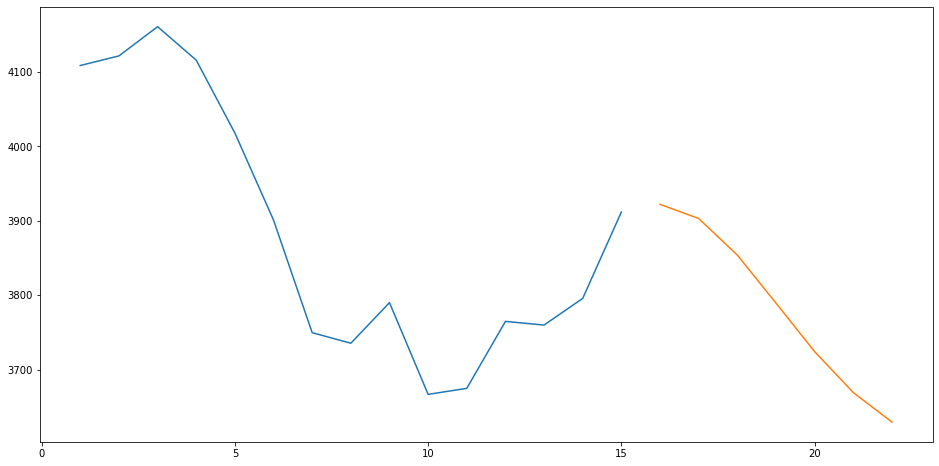

In [182]:
plt.figure(figsize=(16,8))
plt.plot(day_new,scaler.inverse_transform(df1[2500:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

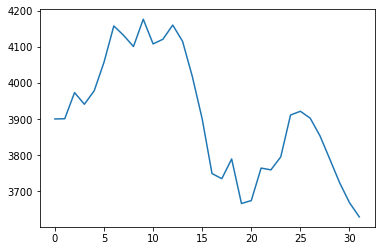

In [183]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(scaler.inverse_transform(df3[2490:]))

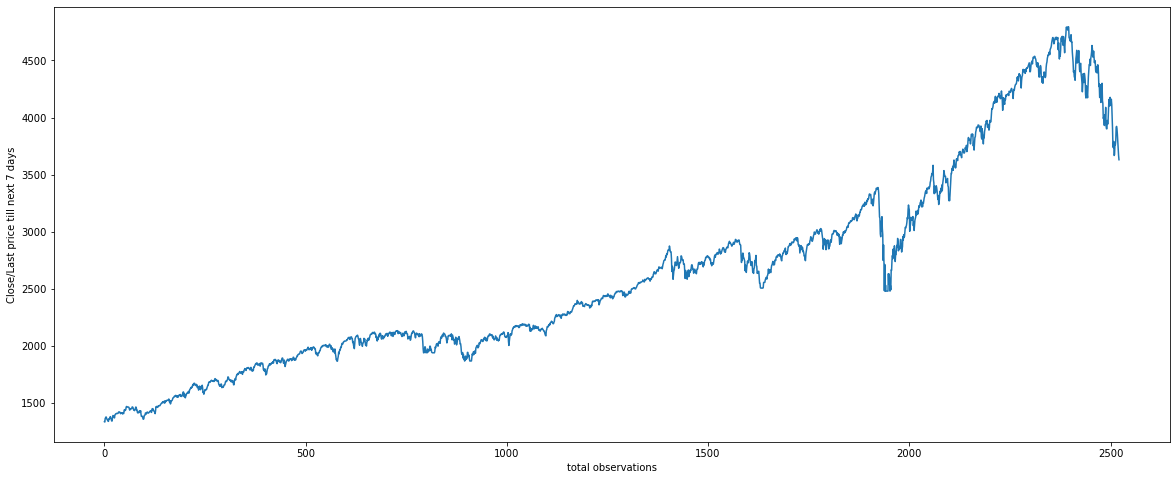

In [184]:
df3=scaler.inverse_transform(df3).tolist()
plt.figure(figsize=(20,8))
plt.xlabel("total observations")
plt.ylabel("Close/Last price till next 7 days")
plt.plot(df3)